# Healthcare Analytics Project : Heart Failure Prediction

## Group#: 18 

|Name | Student ID | 
|:-:|:-:|
|Pal, Tanvi|0779654  |
|Lohe,Khyati Rameshbhai|0779212 |
|Murzello,Jervis Simon| 0784028 |
|Fatima, Iman| 0784241 |
|Joshi, Nikhil| 0780808 |

In [144]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
import plotly.offline as py


from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
p=Path().cwd()
heart = pd.read_csv(p/'heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [5]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Age of the patients in the dataset range from 28y to 77y. Fasting BS has only 2 values so it should be treated as categorical instead of numerical.  

In [6]:
heart['FastingBS'] = heart['FastingBS'].astype(object)


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


### Distribution of numerical variables

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C

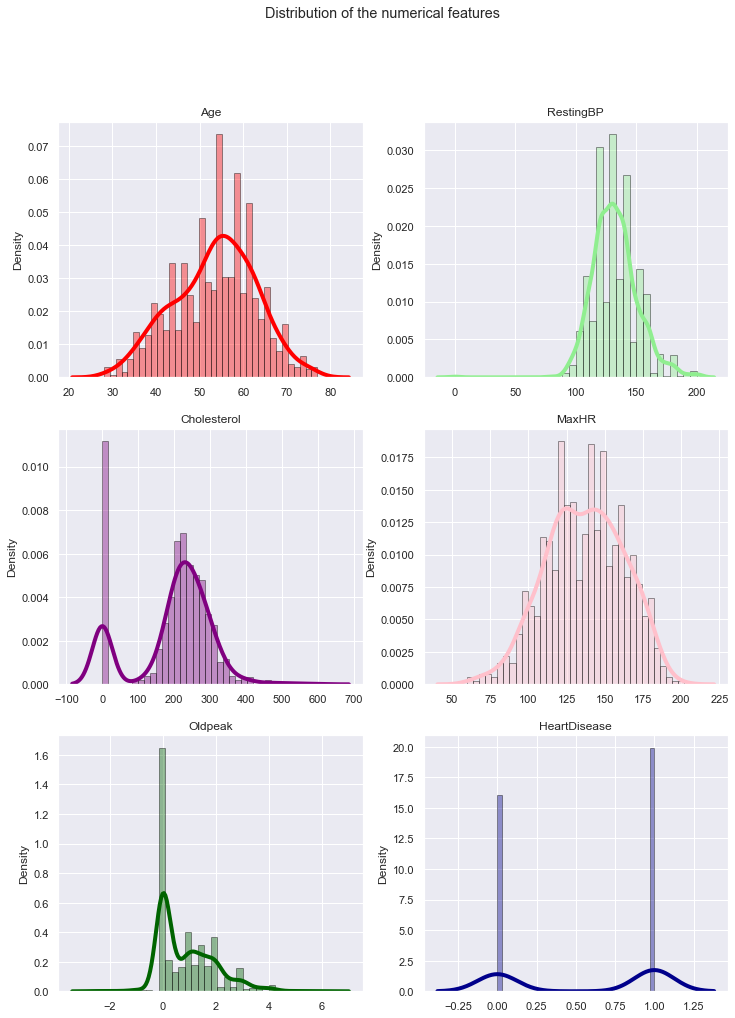

In [65]:
heart_num=heart._get_numeric_data()


indexes = [ (i,j) for i in range(3) for j in range(2)]
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
chart_colors = ['red', 'lightgreen', 'purple', 'pink', 'darkgreen', 'darkblue']

fig.suptitle('Distribution of the numerical features')
sns.set_style('darkgrid')

for index, column, color in zip(indexes, heart_num.columns, chart_colors):
    sns.distplot(heart_num,x=heart_num[column],ax=axes[index], hist=True, kde=True, bins=int(180/5), color = color, hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}).set_title(column)
    
plt.show()    

- Majority of the pateints are between 50-60 years of age. 
- RestingBP ranges from 120 to 150 in majority of the dataset.
- Cholestrol is concentrated around 150 to 300
- MaxHR is almost normally distributed with mean at about 130.
- Old peak has a peak at 0 along with some sidtribution around 1 and 3


### Categorical Vairables

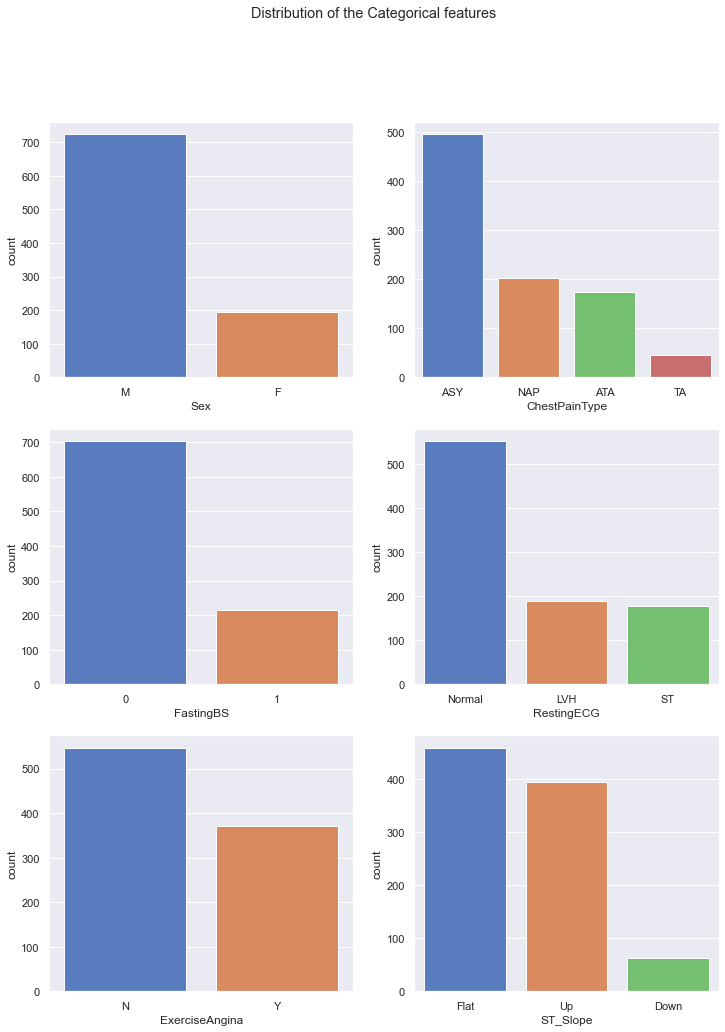

In [116]:
heart_cat = pd.DataFrame(heart.select_dtypes(include='object'))
sns.set_palette('muted')
indexes = [ (i,j) for i in range(3) for j in range(2)]
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
chart_colors = ['red', 'lightgreen', 'purple', 'pink', 'darkgreen', 'darkblue']

fig.suptitle('Distribution of the Categorical features')
sns.set_style('darkgrid')

for index, column, color in zip(indexes, heart_cat.columns, chart_colors):
    counts = heart_cat[column].value_counts().rename_axis(column).reset_index(name='count')
    sns.barplot(x=column,y='count',data=counts,ax=axes[index])
    
plt.show()    



- Most of the patients are asymptomatic i.e. not showing any symptom for chest pain

- There are more male patients than female patients.

- More than half of the patients have fastig Blood sugar level of less than 120 mg/dl 

- Almost equal number if patients have LVH and ST as Resting ECG state while majority of the patients have normal state 

- The number of patients with Exercise Induced Angina is close to but less than those without Exercise Induced Angina.

- There are most number of patients with 'Flat' ST_slope, followed by 'Up' and then 'Down' . 

### Target Variable:

Now we will check the distribution of the 'HeartDisease' variable, which is our target variable

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

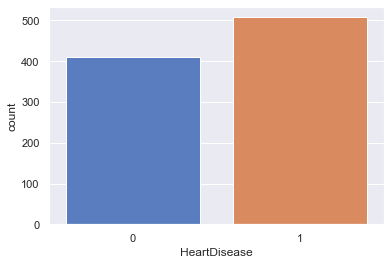

In [117]:
counts = heart.HeartDisease.value_counts().rename_axis('HeartDisease').reset_index(name='count')
sns.barplot(x='HeartDisease',y='count',data=counts)

- We have almost same number of cases for when Heart Failure is detected in pateints and when it is not detected.

### Numerical Variables: Correlation matrix 

<AxesSubplot:title={'center':'Correlation with Target Variable'}>

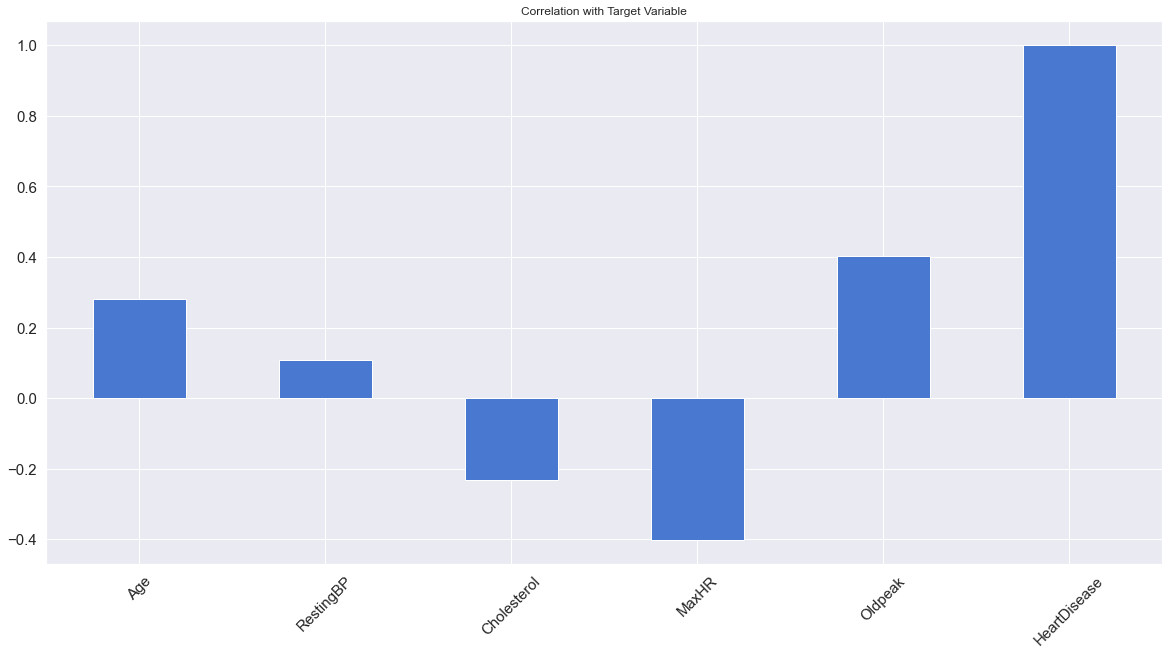

In [118]:
heart_num.corrwith(heart_num.HeartDisease).plot.bar(figsize = (20, 10), title = 'Correlation with Target Variable', 
                                   fontsize = 15, rot = 45, grid = True)


- Age, RestingBP and Oldpeak have positive correlation with 'HeartDisease'. Meaning Old people with high RestingBP and Oldpeak are more prone to Heart Failure. Oldpeak has the strongest correlation((remember makes sense because this feature is related to depression) followed by Age and then RestingBP.

- Cholesterol and MaxHR  have negative correlation with 'HeartDisease'.Meaning lower the MaxHR and Cholesterol, the higher the risk of Heart Failure.However Max Heart Rate has a stronger correlation than Cholesterol. 

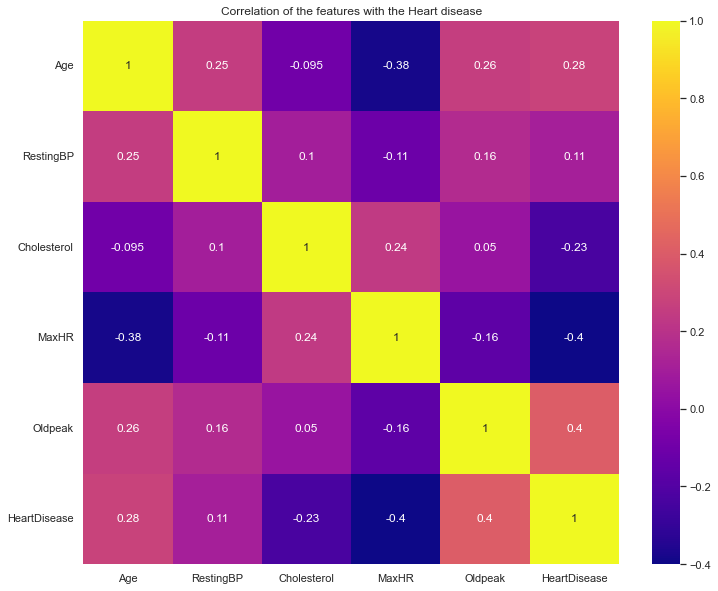

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(heart_num.corr(), annot=True, cmap='plasma')
plt.yticks(rotation=0)
plt.title('Correlation of the features with the Heart disease');

### Categorical Varibales & the Response Variable

In [75]:
cat_columns = heart.select_dtypes(include='object').columns.tolist()

In [76]:
cat_columns

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

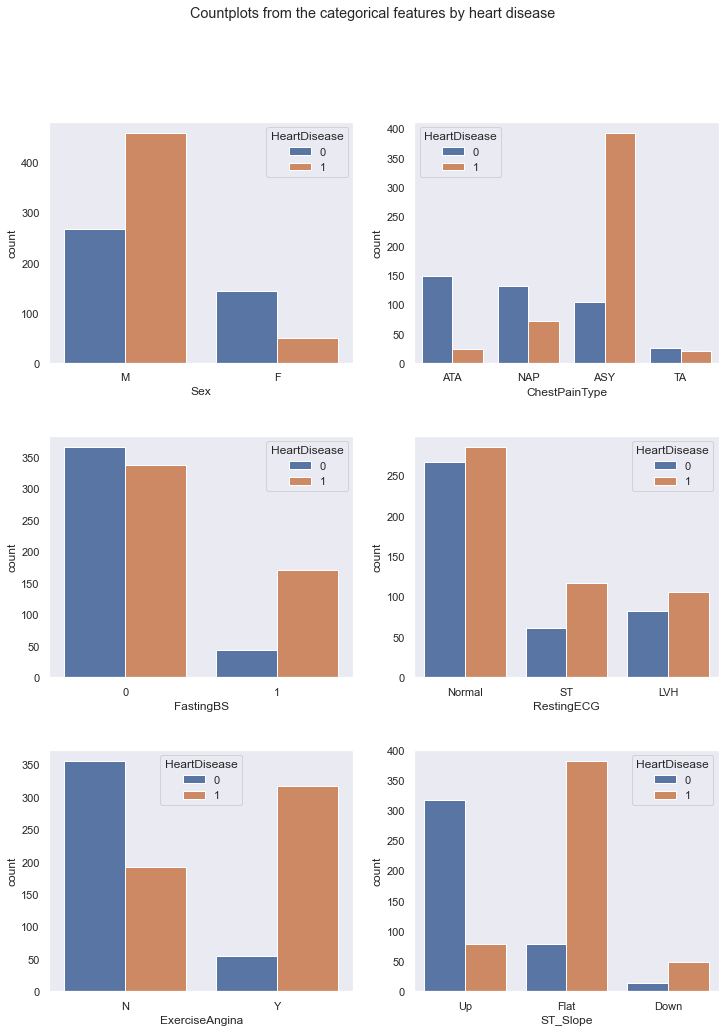

In [77]:
indexes = [ (i,j) for i in range(3) for j in range(2)]

fig, axes = plt.subplots(3, 2, figsize=(12, 16))

fig.suptitle('Countplots from the categorical features by heart disease')

for index, column in zip(indexes, heart[cat_columns].columns):
    sns.countplot(ax=axes[index], data=heart, x=heart[cat_columns][column], hue='HeartDisease')
    
fig.subplots_adjust(hspace=.3)

The categorical features reveal the following information:

- Men are at a far more greater risk of a heart disease than women.
- Regarding chest pain type, ASY (Asymptomatic) is the most common type among people with a heart disease.
- People with Excercise induced angina Y (Yes) are twice more likely to have a heart disease thanpeople with N (No).
- The slope of the peak exersice ST as flat is the most related one to the target.
- Fasting Blood Sugar of 0 (FastingBS < 120 mg/dl) is a sign of potentially having a heart disease.


### Feature Engineering

We are separating feature set from the target variable, that we want to predict.

In [169]:
X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']

#### One hot encoding categorical variables

In [170]:
X = pd.get_dummies(X, drop_first=True) 
X

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,0,0,1,1,0,0,1,0
915,57,130,131,115,1.2,1,0,0,0,0,1,0,1,1,0
916,57,130,236,174,0.0,0,1,0,0,0,0,0,0,1,0


#### Splitting data into training,testing sets

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Scaling

In [189]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Finding optimum number of k for KNN classifier

We will calculate the min error rate and maximum accuracy for k=1 to k=50 so we can find the optimum number of Ks

Minimum error:- 0.14130434782608695 at K = 33


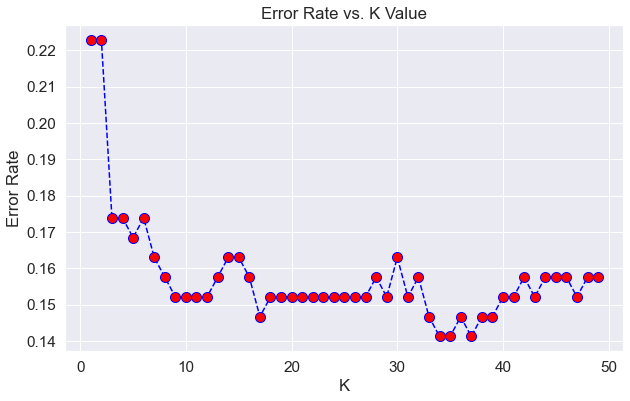

In [197]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8586956521739131 at K = 33


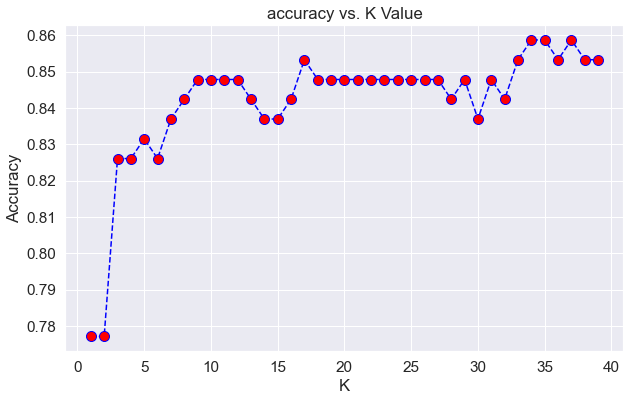

In [198]:
acc=[]
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,weights='distance').fit(scaled_X_train,y_train)
    yhat = neigh.predict(scaled_X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

#### Training the model

In [199]:
knn = KNeighborsClassifier(n_neighbors=33, weights='distance')
knn = knn.fit(scaled_X_train, y_train)
y_pred = knn.predict(scaled_X_test)


#### Evaluating results

##### Confusion Matrix

<AxesSubplot:>

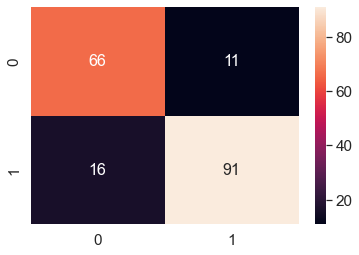

In [200]:
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})


#### Metrics

In [201]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print ("******Model Statistics ******")
print ("Accuracy of Model = ",accuracy_score(y_test, y_pred))
print ("Precison of Model = ",precision_score(y_test, y_pred))
print ("Recall of Model   = ",recall_score(y_test, y_pred))
print ("F1 score of Model  = ",f1_score(y_test, y_pred))
print ("****************************")


******Model Statistics ******
Accuracy of Model =  0.8532608695652174
Precison of Model =  0.8921568627450981
Recall of Model   =  0.8504672897196262
F1 score of Model  =  0.8708133971291867
****************************
